# CO2 EMISSION DATASET

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
warnings.filterwarnings('ignore')



df = pd.DataFrame(pd.read_csv("CO2 Emissions_Canada.csv"))
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


## DATA EXPLORATION

In [19]:
# Basic Information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [20]:
# Checking for duplicates
print("Duplicated data: ",df.duplicated().sum())

Duplicated data:  1103


In [21]:
workingDF = df.drop_duplicates()
print("Number of duplicates after removal:", df.duplicated().sum())

Number of duplicates after removal: 1103


In [22]:
# Statistical Summary
workingDF.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000
mean,3.161812,5.618911,12.610220,9.070583,11.017876,27.411016,251.157752
std,1.365201,1.846250,3.553066,2.278884,2.946876,7.245318,59.290426
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


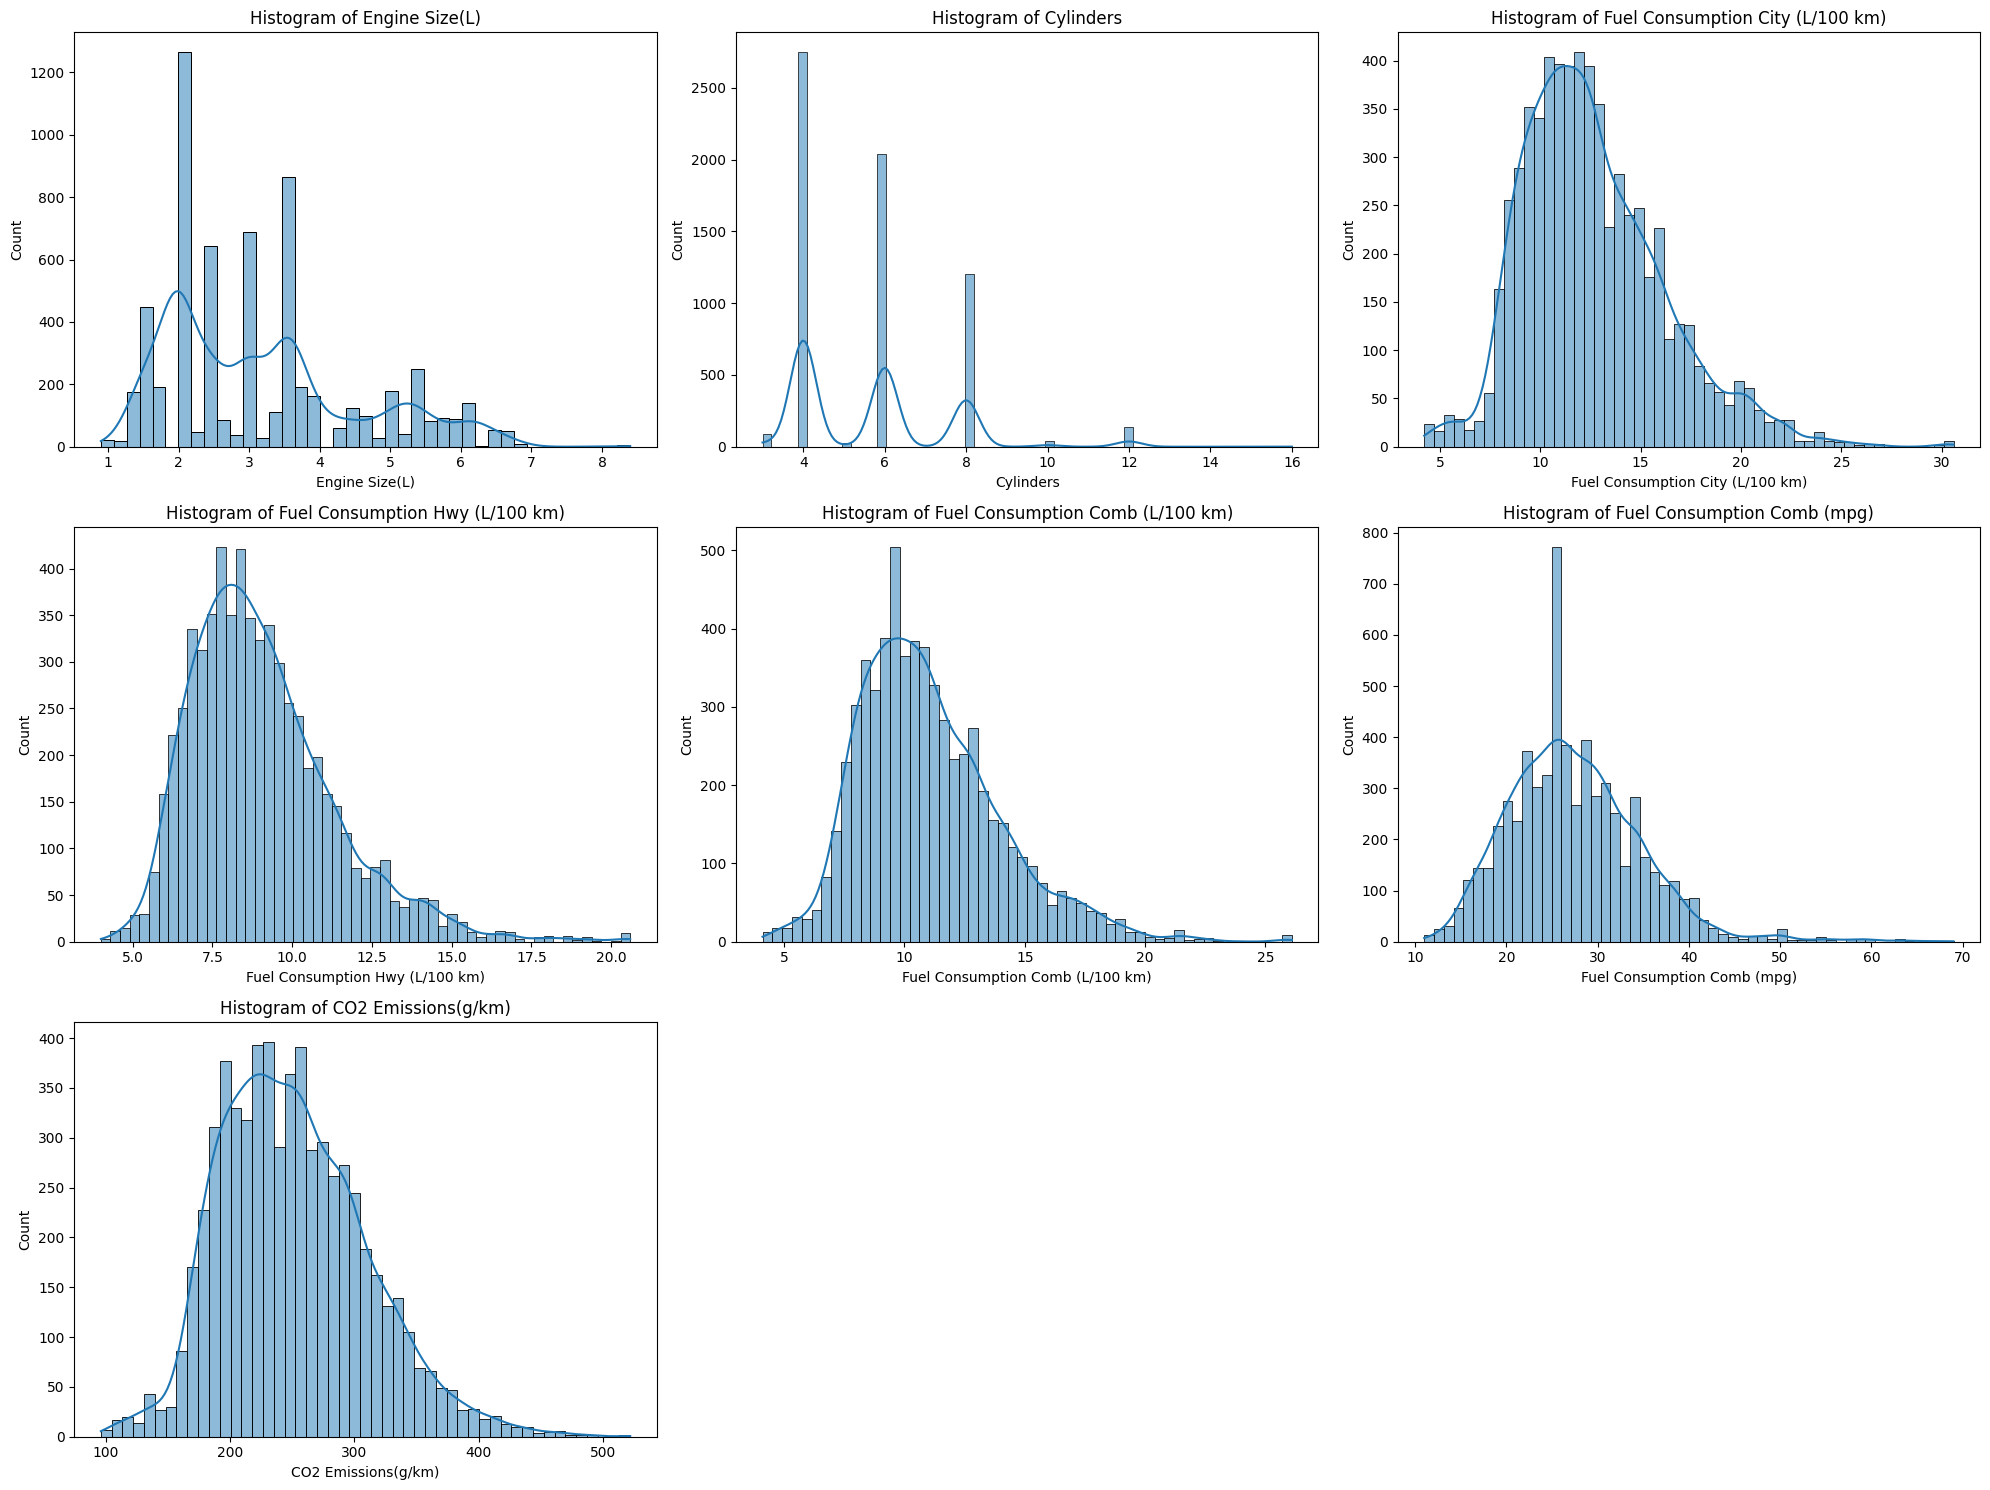

In [25]:
num_cols = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 
            'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 
            'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']

# Number of rows and columns for the subplot grid
n_rows = len(num_cols) // 3 + int(len(num_cols) % 3 != 0)
n_cols = 3

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(num_cols):
    sns.histplot(workingDF[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

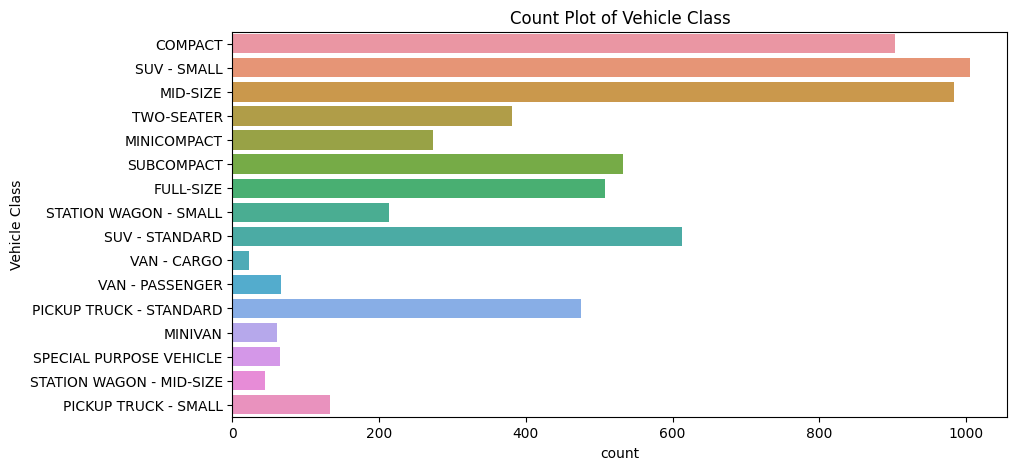

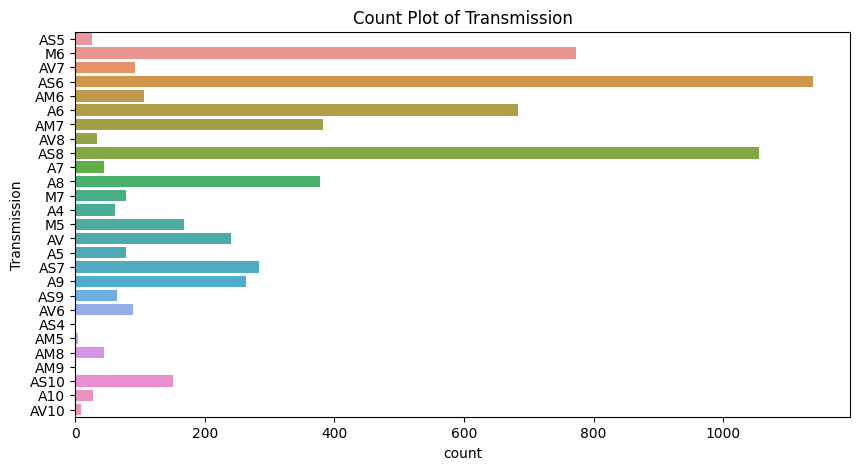

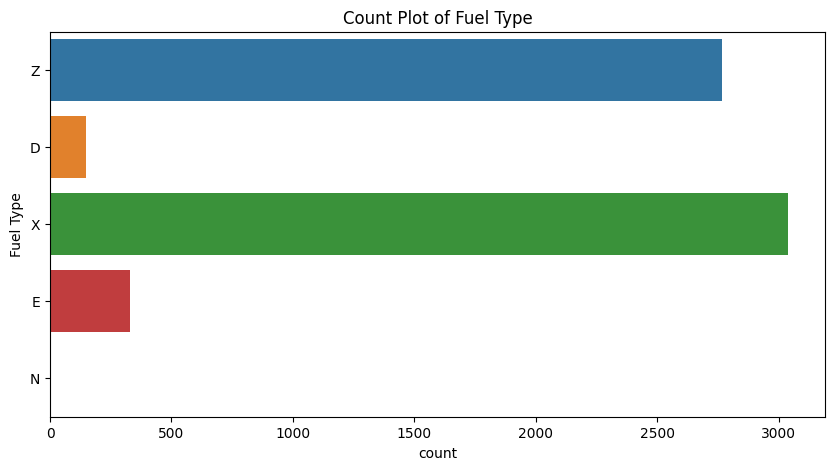

In [26]:
# Bar plots for categorical columns
cat_cols = ['Vehicle Class', 'Transmission', 'Fuel Type']
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=workingDF[col])
    plt.title(f'Count Plot of {col}')
    plt.show()

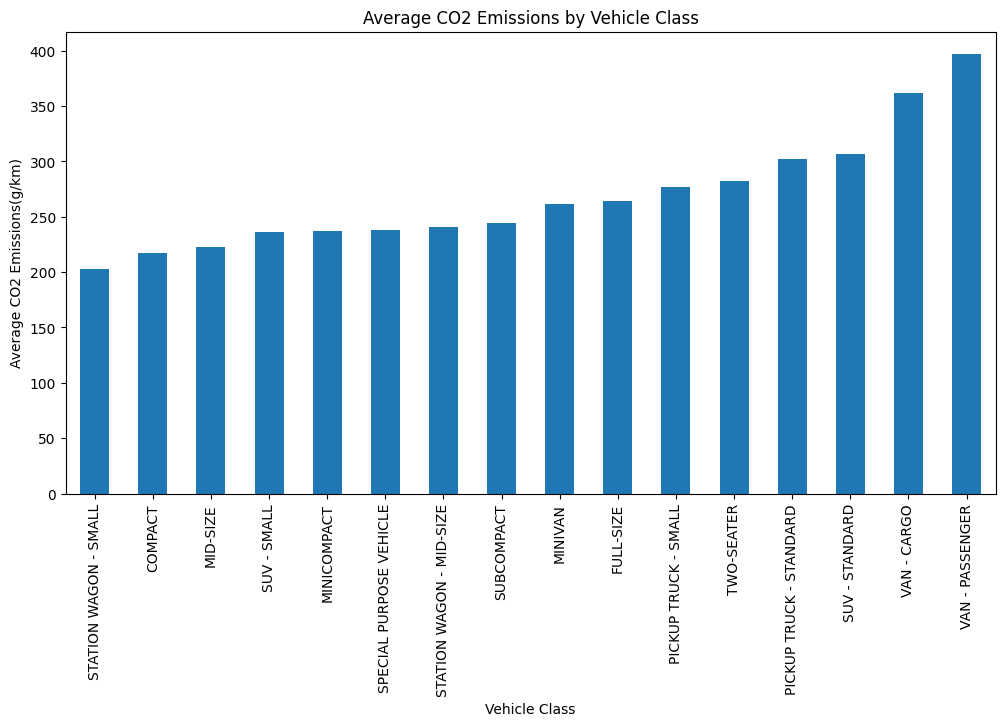

In [27]:
# Average CO2 emissions by Vehicle Class
grouped_data = workingDF.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean()
plt.figure(figsize=(12, 6))
grouped_data.sort_values().plot(kind='bar')
plt.title('Average CO2 Emissions by Vehicle Class')
plt.ylabel('Average CO2 Emissions(g/km)')
plt.show()

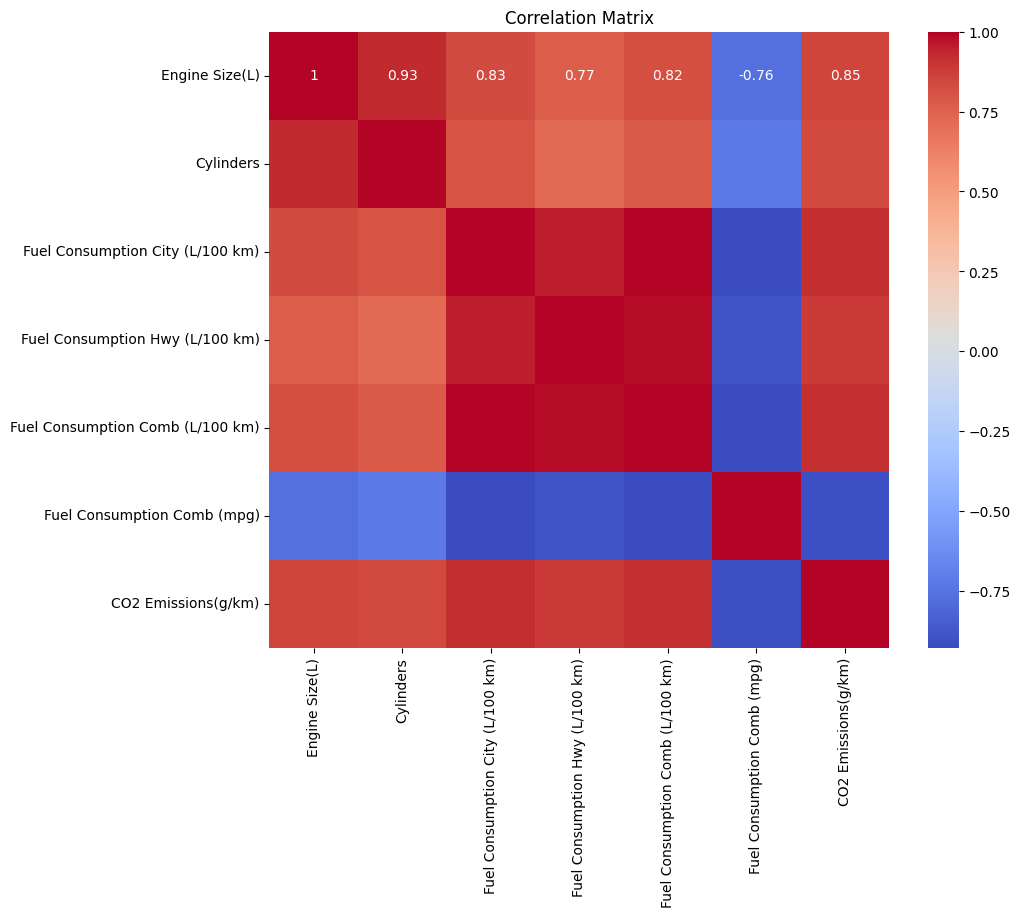

In [28]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(workingDF[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## FEATURE ENGINERING

In [29]:
# Encoding Categorical Variables
categorical_cols = ['Vehicle Class', 'Transmission', 'Fuel Type']
workingDF_encoded = pd.get_dummies(workingDF, columns=categorical_cols)

In [30]:
# Creating Interaction Features
workingDF_encoded['EngineSize_Cylinders'] = workingDF['Engine Size(L)'] * workingDF['Cylinders']

In [31]:
# Binning CO2 Emissions
bins = [0, 200, 300, max(workingDF['CO2 Emissions(g/km)'])]
labels = ['Low', 'Medium', 'High']
workingDF_encoded['CO2 Emissions Category'] = pd.cut(workingDF['CO2 Emissions(g/km)'], bins=bins, labels=labels)

In [35]:
# Feature Scaling
scaler = StandardScaler()
scaled_columns = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']
workingDF_encoded[scaled_columns] = scaler.fit_transform(workingDF_encoded[scaled_columns])

In [36]:
workingDF_encoded

,Make,Model,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Vehicle Class_COMPACT,...,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z,EngineSize_Cylinders,CO2 Emissions Category
0,ACURA,ILX,-0.851086,-0.876934,9.9,6.7,-0.854490,33,-0.930372,True,...,False,False,False,False,False,False,False,True,8.0,Low
1,ACURA,ILX,-0.558066,-0.876934,11.2,7.7,-0.481184,29,-0.508685,True,...,False,True,False,False,False,False,False,True,9.6,Medium
2,ACURA,ILX HYBRID,-1.217362,-0.876934,6.0,5.8,-1.736851,48,-1.942420,True,...,False,False,False,False,False,False,False,True,6.0,Low
3,ACURA,MDX 4WD,0.247740,0.206429,12.7,9.1,0.027870,25,0.064809,False,...,False,False,False,False,False,False,False,True,21.0,Medium
4,ACURA,RDX AWD,0.247740,0.206429,12.1,8.7,-0.141815,27,-0.120733,False,...,False,False,False,False,False,False,False,True,21.0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,-0.851086,-0.876934,10.7,7.7,-0.549058,30,-0.542420,False,...,False,False,False,False,False,False,False,True,8.0,Medium
7381,VOLVO,XC60 T5 AWD,-0.851086,-0.876934,11.2,8.3,-0.379373,29,-0.323143,False,...,False,False,False,False,False,False,False,True,8.0,Medium
7382,VOLVO,XC60 T6 AWD,-0.851086,-0.876934,11.7,8.6,-0.243625,27,-0.188203,False,...,False,False,False,False,False,False,False,True,8.0,Medium
7383,VOLVO,XC90 T5 AWD,-0.851086,-0.876934,11.2,8.3,-0.379373,29,-0.323143,False,...,False,False,False,False,False,False,False,True,8.0,Medium


## REGRESSION MODEL

In [37]:
# Selecting relevant features for the model
selected_features = [
    "EngineSize_Cylinders",
    "Fuel Consumption City (L/100 km)", 
    "Fuel Consumption Hwy (L/100 km)", 
    "Fuel Consumption Comb (L/100 km)", 
    "Fuel Consumption Comb (mpg)",
    # Transmission encoded
    "Transmission_AS5", "Transmission_M6", "Transmission_AV7", "Transmission_AS6", "Transmission_AM6", "Transmission_A6", "Transmission_AM7",
    "Transmission_AV8", "Transmission_AS8", "Transmission_A7", "Transmission_A8", "Transmission_M7", "Transmission_A4", "Transmission_M5", 
    "Transmission_AV", "Transmission_A5", "Transmission_AS7", "Transmission_A9", "Transmission_AS9", "Transmission_AV6", "Transmission_AS4",
    "Transmission_AM5", "Transmission_AM8", "Transmission_AM9", "Transmission_AS10",  "Transmission_A10", "Transmission_AV10",
    # FuelType encoded
    "Fuel Type_Z", "Fuel Type_D", "Fuel Type_X", "Fuel Type_E", "Fuel Type_N",
    # Vechicle Class encoded
    "Vehicle Class_COMPACT" , "Vehicle Class_SUV - SMALL" , "Vehicle Class_MID-SIZE", "Vehicle Class_TWO-SEATER", "Vehicle Class_MINICOMPACT",
    "Vehicle Class_SUBCOMPACT", "Vehicle Class_FULL-SIZE", "Vehicle Class_STATION WAGON - SMALL",
    "Vehicle Class_SUV - STANDARD", "Vehicle Class_VAN - CARGO", "Vehicle Class_VAN - PASSENGER",
    "Vehicle Class_PICKUP TRUCK - STANDARD", "Vehicle Class_MINIVAN", "Vehicle Class_SPECIAL PURPOSE VEHICLE",
    "Vehicle Class_STATION WAGON - MID-SIZE", "Vehicle Class_PICKUP TRUCK - SMALL"

]

# Target variable
target = "CO2 Emissions(g/km)"

# Separating the features and the target variable
X = workingDF_encoded[selected_features]
y = workingDF_encoded[target]

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Decision Tree Regressor

In [78]:
# Training the Decision Tree Regressor model
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [79]:
# Predicting on the test set
y_pred_dt = dt_reg.predict(X_test)

# Calculating evaluation metrics
rmse_DT = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_DT = r2_score(y_test, y_pred_dt)

print("Decision Tree Regressor RMSE\t\t: ", rmse_DT)
print("Decision Tree Regressor R-squared\t: ", r2_DT)

Decision Tree Regressor RMSE		:  0.06701629048607645
Decision Tree Regressor R-squared	:  0.9956257118949741


#### KNN Regressor

In [80]:
# Training the KNN Regressor model
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [81]:
# Predicting on the test set
y_pred_knn = knn_reg.predict(X_test)

# Calculating evaluation metrics
rmse_KNN = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_KNN = r2_score(y_test, y_pred_knn)

print("KNN Regressor RMSE\t: ", rmse_KNN)
print("KNN Regressor R-squared\t: ", r2_KNN)

KNN Regressor RMSE	:  0.11228009740048296
KNN Regressor R-squared	:  0.9877213060300837


#### Linear Regression

In [47]:
# Training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [91]:
# Predicting on the test set
y_pred_lr = model.predict(X_test)

# Calculating evaluation metrics
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression RMSE\t\t: ", rmse_lr)
print("Linear Regression R-squared\t: ",r2_lr)

Linear Regression RMSE		:  0.09361229005230334
Linear Regression R-squared	:  0.9914648265131405


## CLASSIFICATION MODEL

In [68]:
# Target variable for classification
target_classification = "CO2 Emissions Category"

# Separating the features and the target variable for classification
y_classification = workingDF_encoded[target_classification]

# Splitting the dataset into training (80%) and testing (20%) sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X, y_classification, test_size=0.2, random_state=42
)

#### Decision Tree Classifier

In [85]:
# Training the Decision Tree Classifier
dt_class = DecisionTreeClassifier(random_state=42)
dt_class.fit(X_train_class, y_train_class)

DecisionTreeClassifier(random_state=42)

In [86]:
# Predicting on the test set
y_pred_dt_class = dt_class.predict(X_test_class)

# Calculating classification metrics
accuracy_DTC =  accuracy_score(y_test_class, y_pred_dt_class)
classification_report_result_DTC = classification_report(y_test_class, y_pred_dt_class)

print("Decision Tree Classifier Accuracy\t\t: ", accuracy_DTC)
print("Decision Tree Classifier Classification Report\t:\n", classification_report_result_DTC)

Decision Tree Classifier Accuracy		:  0.9832935560859188
Decision Tree Classifier Classification Report	:
               precision    recall  f1-score   support

        High       0.97      0.97      0.97       245
         Low       0.99      0.98      0.99       263
      Medium       0.99      0.99      0.99       749

    accuracy                           0.98      1257
   macro avg       0.98      0.98      0.98      1257
weighted avg       0.98      0.98      0.98      1257



#### Binary / Multinominal Logistic Regression

In [87]:
# Training the Logistic Regression Classifier
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_class, y_train_class)

LogisticRegression(max_iter=1000, random_state=42)

In [88]:
# Predicting on the test set
y_pred_log = log_reg.predict(X_test_class)

# Calculating classification metrics
accuracy_log  = accuracy_score(y_test_class, y_pred_log)
classification_report_result_log = classification_report(y_test_class, y_pred_log)

print("Logistic Regression Accuracy\t\t\t: ", accuracy_log)
print("Logistic Regression Classification Report\t:\n", classification_report_result_log)

Logistic Regression Accuracy			:  0.9673826571201273
Logistic Regression Classification Report	:
               precision    recall  f1-score   support

        High       0.96      0.95      0.95       245
         Low       0.96      0.97      0.96       263
      Medium       0.97      0.97      0.97       749

    accuracy                           0.97      1257
   macro avg       0.96      0.96      0.96      1257
weighted avg       0.97      0.97      0.97      1257



#### KNN Classifier

In [89]:
# Training the KNN Classifier
knn_class = KNeighborsClassifier()
knn_class.fit(X_train_class, y_train_class)

KNeighborsClassifier()

In [84]:
X_test_classKNNCLS = np.ascontiguousarray(X_test_class)
# Predicting on the test set
y_pred_knn_class = knn_class.predict(X_test_classKNNCLS)

# Calculating classification metrics
accuracy_KNNCLS = accuracy_score(y_test_class, y_pred_knn_class)
classfication_report_result_KNNCLS = classification_report(y_test_class, y_pred_knn_class)

print("KNN Classifier Accuracy\t\t\t: ", accuracy_KNNCLS)
print("KNN Classifier Classification Report\t:\n", classfication_report_result_KNNCLS)

KNN Classifier Accuracy			:  0.9681782020684169
KNN Classifier Classification Report	:
               precision    recall  f1-score   support

        High       0.96      0.96      0.96       245
         Low       0.96      0.97      0.97       263
      Medium       0.97      0.97      0.97       749

    accuracy                           0.97      1257
   macro avg       0.96      0.97      0.96      1257
weighted avg       0.97      0.97      0.97      1257



#### Naive Bayes

In [83]:
# Training the Naive Bayes Classifier
nb_class = GaussianNB()
nb_class.fit(X_train_class, y_train_class)

GaussianNB()

In [82]:
# Predicting on the test set
y_pred_nb = nb_class.predict(X_test_class)

# Calculating classification metrics
accuracy_nb = accuracy_score(y_test_class, y_pred_nb)
classifaction_report_result_nb = classification_report(y_test_class, y_pred_nb)

print("Naive Bayes Classifier Accuracy\t\t\t: ", accuracy_nb)
print("Naive Bayes Classifier CLassification Report\t:\n", classifaction_report_result_nb)

Naive Bayes Classifier Accuracy			:  0.45584725536992843
Naive Bayes Classifier CLassification Report	:
               precision    recall  f1-score   support

        High       0.38      0.97      0.55       245
         Low       0.47      0.97      0.63       263
      Medium       0.88      0.11      0.19       749

    accuracy                           0.46      1257
   macro avg       0.58      0.68      0.46      1257
weighted avg       0.70      0.46      0.35      1257



#### Random Forest

In [74]:
# Training the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_class, y_train_class)

RandomForestClassifier(random_state=42)

In [76]:
# Predicting on the test set
y_pred_class = rf_classifier.predict(X_test_class)

# Calculating classification metrics
accuracy = accuracy_score(y_test_class, y_pred_class)
classification_report_result = classification_report(y_test_class, y_pred_class)

print("Random Forest Accuracy\t\t\t: ", accuracy) 
print("Random Forest Classification Report\t:\n ", classification_report_result)

Random Forest Accuracy			:  0.9817024661893397
Random Forest Classification Report	:
                precision    recall  f1-score   support

        High       0.97      0.98      0.97       245
         Low       0.98      0.99      0.98       263
      Medium       0.99      0.98      0.98       749

    accuracy                           0.98      1257
   macro avg       0.98      0.98      0.98      1257
weighted avg       0.98      0.98      0.98      1257

